# Bank Marketing Data Set 

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

## Attribute information
| #  | name                                                  | description                                                                                                                                                                                                                                                                                                                                                           |
|----|-------------------------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| -  | ---------------                                       | #bank client data:  ---------------                                                                                                                                                                                                                                                                                                                                                   |
| 1  | age                                                   | numeric                                                                                                                                                                                                                                                                                                                                                               |
| 2  | job : type of job                                     | categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown'                                                                                                                                                                                                        |
| 3  | marital : marital status                              | categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed                                                                                                                                                                                                                                                                      |
| 4  | education                                             | categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown'                                                                                                                                                                                                                                          |
| 5  | default: has credit in default?                       | categorical: 'no','yes','unknown'                                                                                                                                                                                                                                                                                                                                     |
| 6  | housing: has housing loan?                            | categorical: 'no','yes','unknown'                                                                                                                                                                                                                                                                                                                                     |
| 7  | loan: has personal loan?                              | categorical: 'no','yes','unknown'                                                                                                                                                                                                                                                                                                                                     |
| -  | ---------------                                       | #related with the last contact of the current campaign:    ---------------                                                                                                                                                                                                                                                                                                            |
| 8  | contact: contact communication type                   | categorical: 'cellular','telephone'                                                                                                                                                                                                                                                                                                                                   |
| 9  | month: last contact month of year                     | categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec'                                                                                                                                                                                                                                                                                                                   |
| 10 | day_of_week: last contact day of the week             | categorical: 'mon','tue','wed','thu','fri'                                                                                                                                                                                                                                                                                                                            |
| 11 | duration: last contact duration, in seconds (numeric) | Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model. |
| -  | ---------------                                       | # other attributes:  ---------------                                                                                                                                                                                                                                                                                                                                                  |
| 12 | campaign                                              | number of contacts performed during this campaign and for this client (numeric, includes last contact)                                                                                                                                                                                                                                                                |
| 13 | pdays                                                 | number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)                                                                                                                                                                                                                   |
| 14 | previous                                              | number of contacts performed before this campaign and for this client (numeric)                                                                                                                                                                                                                                                                                       |
| 15 | poutcome                                              | outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')                                                                                                                                                                                                                                                                           |
| -  | ---------------                                       | # social and economic context attributes    ---------------                                                                                                                                                                                                                                                                                                                           |
| 16 | emp.var.rate                                          | employment variation rate - quarterly indicator (numeric)                                                                                                                                                                                                                                                                                                             |
| 17 | cons.price.idx                                        | consumer price index - monthly indicator (numeric)                                                                                                                                                                                                                                                                                                                    |
| 18 | cons.conf.idx                                         | consumer confidence index - monthly indicator (numeric)                                                                                                                                                                                                                                                                                                               |
| 19 | euribor3m                                             | euribor 3 month rate - daily indicator (numeric)                                                                                                                                                                                                                                                                                                                      |
| 20 | nr.employed                                           | number of employees - quarterly indicator (numeric)                                                                                                                                                                                                                                                                                                                   |
| -  | ----------------                                      | Output variable (desired target):      ---------------                                                                                                                                                                                                                                                                                                                                |
| 21 | y                                                     | has the client subscribed a term deposit? (binary: 'yes','no')                                                                                                                                                                                                                                                                                                        |

## 1. Load data & Data check

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import KFold

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.decomposition import PCA
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

/Users/jkchang/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
data = pd.read_csv('./resources/project1.csv', na_values =['NA'])
print(data.shape)
print(data.info())

(41188, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp_var_rate      41188 non-null float64
cons_price_idx    41188 non-null float64
cons_conf_idx     41188 non-null float64
euribor3m         41188 non-null float64
nr_employed       41188 non-null float64
y                 41188 non-null int64
dtypes: float64(5), int64(6), object(10)

#### Conducting EDA on the raw data.

In [3]:
def examine_data_frame(df):
    for name in df.columns:
        print("----------")
        print(df[name].dtype)
        if df[name].dtype is np.dtype('O'):
            print(df[name].value_counts())
            print("Name: ", name)
        else:
            print(df[name].describe())

examine_data_frame(data)

----------
int64
count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64
----------
object
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
Name:  job
----------
object
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
Name:  marital
----------
object
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64
Name:  education
----------
object
no         3

## 2. Data filtering & Cleaning

### 2.1 remove unknown (object)

In [4]:
for col in data.columns:
    try:
        print(col,data[data[col] == 'unknown'][col].count())
    except:
        continue

job 330
marital 80
education 1731
default 8597
housing 990
loan 990
contact 0
month 0
day_of_week 0
poutcome 0


/Users/jkchang/anaconda3/lib/python3.6/site-packages/pandas/core/ops.py:816: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(x, name)(y)


In [5]:
# drop un-known rows
unknow_cols = ['job','marital','loan','education']
for col in unknow_cols:
    data = data[data[col]!='unknown']
data = data[data.education != 'illiterate']

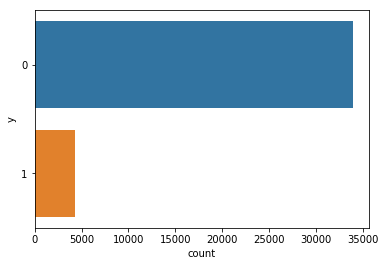

In [6]:
sns.countplot(y='y', data=data);

In [7]:
def categorize(df):
    new_df = df.copy()
    le = preprocessing.LabelEncoder()
    
    new_df['job'] = le.fit_transform(new_df['job'])
    new_df['marital'] = le.fit_transform(new_df['marital'])
    new_df['education'] = le.fit_transform(new_df['education'])
    new_df['default'] = le.fit_transform(new_df['default'])
    new_df['housing'] = le.fit_transform(new_df['housing'])
    new_df['month'] = le.fit_transform(new_df['month'])
    new_df['loan'] = le.fit_transform(new_df['loan'])
    new_df['contact'] = le.fit_transform(new_df['contact'])
    new_df['day_of_week'] = le.fit_transform(new_df['day_of_week'])
    new_df['poutcome'] = le.fit_transform(new_df['poutcome'])
    new_df['y'] = le.fit_transform(new_df['y'])
    return new_df

In [8]:
data = categorize(data)
data = data.convert_objects(convert_numeric=True)

/Users/jkchang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


### 2.2 Remove outliers points

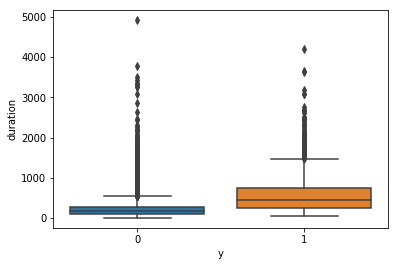

In [9]:
sns.boxplot(x='y', y='duration', data=data)

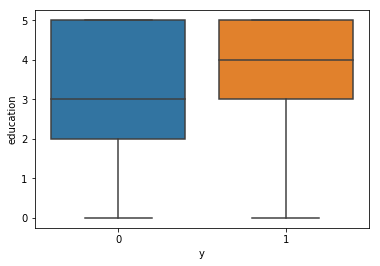

In [10]:
sns.boxplot(x='y', y='education', data=data)

1    20568
0    17659
Name: housing, dtype: int64


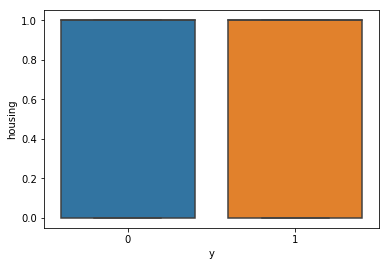

In [11]:
sns.boxplot(x='y', y='housing', data=data)
print(data.housing.value_counts())


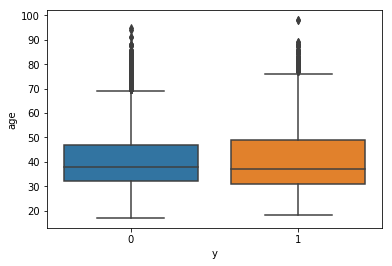

In [12]:
sns.boxplot(data['y'],data['age'])

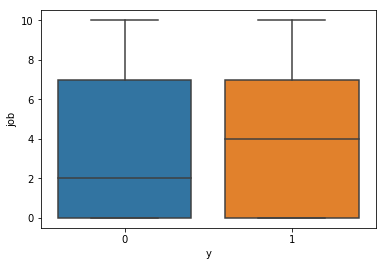

In [13]:
sns.boxplot(data['y'],data['job'])

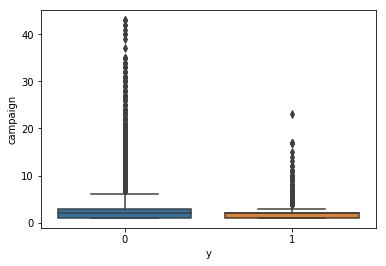

In [14]:
sns.boxplot(data['y'],data['campaign'])

In [15]:
def remove_outliers(df, column, minimum, maximum):
    col_values = df[column].values
    df[column] = np.where(
        np.logical_or(col_values < minimum, col_values > maximum),
        col_values.mean(), col_values)
    return df

In [16]:
min_val = data["duration"].min()
max_val = 1500
data = remove_outliers(df=data, column='duration' , minimum=min_val, maximum=max_val)

min_val = data["age"].min()
max_val = 80
data = remove_outliers(df=data, column='age' , minimum=min_val, maximum=max_val)

min_val = data["campaign"].min()
max_val = 6
data = remove_outliers(df=data, column='campaign' , minimum=min_val, maximum=max_val)

### 2.3 Dropping less meaningful columns

In [17]:
data.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'], dtype=object)

In [19]:
data = data.drop(
    [
        'default', 'contact', 'month', 'day_of_week', 'duration', 'poutcome',
        'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m',
        'nr_employed'
    ],
    axis=1)
data.columns.values

array(['age', 'job', 'marital', 'education', 'housing', 'loan',
       'campaign', 'pdays', 'previous', 'y'], dtype=object)

## 3. Data analysis

In [20]:
X = data.drop('y',axis = 1).values
y = data['y'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [21]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)

In [23]:
pca = PCA(n_components=9)
pca.fit(X_train)
X_train = pca.fit_transform(X_train)

In [24]:
X_train.shape

(28670, 9)

In [25]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decison-Tree', DecisionTreeClassifier()))
models.append(('Gaussian', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RandForest',RandomForestClassifier(max_depth = 8, n_estimators = 120)))
models.append(('ADA', AdaBoostClassifier(n_estimators = 120)))

In [26]:
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=42)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "{}: {}".format(name, cv_results.mean())
    print(msg)

LR: 0.8983257760725497
LDA: 0.8985001743983257
KNN: 0.8909312870596441
Decison-Tree: 0.8555633065922568
Gaussian: 0.89183815835368
SVM: 0.8981862574119288
RandForest: 0.8980467387513078
ADA: 0.8970003487966516


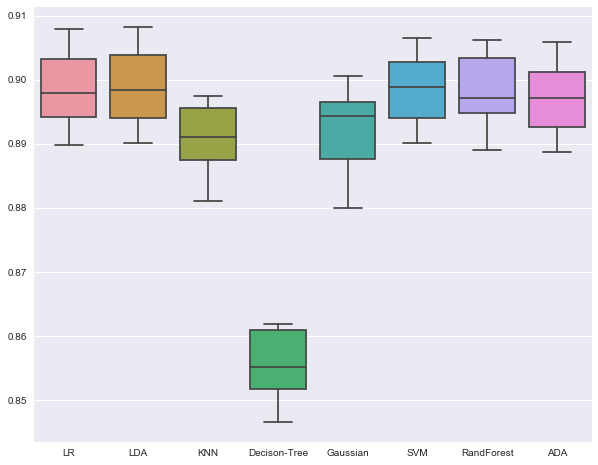

In [27]:
sns.set(rc={'figure.figsize':(10,8)})
sns.boxplot(names,results)

## 4. evaluation

In [28]:
scaler.fit(X_test)
X_test = scaler.fit_transform(X_test)
pca.fit(X_test)
X_test = pca.fit_transform(X_test)

In [33]:
lr = LogisticRegression()
lr.fit(X_train, Y_train)
predictions = lr.predict(X_test)
print("Accuracy : ", accuracy_score(Y_test, predictions))
print("Confusion Matrix : \n",confusion_matrix(Y_test, predictions))
print("Classification Report: \n",classification_report(Y_test, predictions))

Accuracy :  0.8974573610965785
Confusion Matrix : 
 [[8362  124]
 [ 856  215]]
Classification Report: 
              precision    recall  f1-score   support

          0       0.91      0.99      0.94      8486
          1       0.63      0.20      0.30      1071

avg / total       0.88      0.90      0.87      9557

